# Research on Megaline plans

Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our goal is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Step 1: Studying general information

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as st
from scipy.stats import mannwhitneyu
from IPython.display import display
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
# import datasets

try:
    calls = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/sprint_3/data_sets/megaline_calls.csv')
    internet = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/sprint_3/data_sets/megaline_internet.csv')
    messages = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/sprint_3/data_sets/megaline_messages.csv')
    plans = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/sprint_3/data_sets/megaline_plans.csv')
    users = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/sprint_3/data_sets/megaline_users.csv')
except: 
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

Looking at the general information of each of the datasets

In [3]:
# calls 
display(calls.info())
display(calls.head())
display(calls.tail())
display(calls.sample())
display(calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


,id,user_id,call_date,duration
88173,1324_220,1324,2018-06-29,10.86


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [4]:
# internet 
display(internet.info())
display(internet.head())
display(internet.tail())
display(internet.sample())
display(internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


,id,user_id,session_date,mb_used
5338,1029_134,1029,2018-09-26,124.78


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [5]:
# messages 
display(messages.info())
display(messages.head())
display(messages.tail())
display(messages.sample())
display(messages.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23


,id,user_id,message_date
69864,1454_226,1454,2018-12-03


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [6]:
# plans 
display(plans.info())
display(plans.head())
display(plans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [7]:
# users 
display(users.info())
display(users.head())
display(users.tail())
display(users.sample())
display(users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
170,1170,Olin,Adkins,18,"Pittsburgh, PA MSA",2018-09-25,surf,NaN


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


### Conclusion 

We have 5 datasets: 

1) 'users' which contains information on 500 Megaline's users: user's id, user's names, user's age, user's city of residence, user's subscription plan, date of subscription to the plan ('registration date'), and the date a user stopped using this plan. The latter one is missing in the most of cases (466 cases), so it means that the most of the users in the dataset are still using services with the given plan.  

2) 'calls' which contains information on calls made by the users: call's id, user's id which made this call, call's duration and the date of a call. This dataset contains 137735 entries. 

3) 'internet' which contains information on the users' internet connection sessions: internet session' id, user's id which made this session, the session's date,  and the volume of internet traffic used during each of the session. This dataset contains 104825 entries. 

4) 'messages' which contains information on messages sent by the users: message'id, user's id which sent this message, and the date on which the message was sent. 

5) 'plans' which contains information on both of the subcription plans features: number of messages, minutes of calls communication, data volume included in monthly allowance of each of the plans, monthly paymnet rate, and also the rates of fees for exceeding data volume, text messages and minutes of calls with regard to the each of the plans. 

The information is divided into 5 datasets, but each of them contains information on user's id, so we can 'build' the whole picture with regard of each of the users: how each of users used Megaline services.  

A first look at the given datasets let us conclude that there are some issues with the data. Some of the values are of inappropiate data types.  

The values related to dates of:  
- calls (the column 'call_date' in the dataset 'calls'), 
- internet connection sessions (the column 'session_date' in the dataset 'internet') 
- dates of messages (the column 'message_date' in the dataset 'messages'), 
- registration of users (the column 'reg_date' in the 'users' dataset),
- end of subscription (the column 'churn_date' in the 'users' dataset) 

are of object type, while these values represent dates, so they should be converted into datetime format. 

We need to dig deeper into the data to check if there are other issues we need to resolve before analysing the given data. 


## Step 2: Data preprocessing 

In [8]:
# changing data types from 'object' to 'datetime'

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')


In [9]:
# checking the results
display (calls.info())
display (internet.info())
display (messages.info())
display (users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

In [10]:
# looking for errors in calls

calls['id'].unique()

array(['1000_93', '1000_145', '1000_247', ..., '1499_201', '1499_202',
       '1499_203'], dtype=object)

In [11]:
calls['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033,
       1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
       1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055,
       1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066,
       1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077,
       1078, 1079, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1090,
       1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
       1102, 1103, 1104, 1105, 1106, 1107, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1122, 1123, 1124, 1125,
       1126, 1127, 1128, 1130, 1132, 1133, 1134, 1135, 1136, 1138, 1139,
       1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151,
       1152, 1153, 1154, 1155, 1156, 1157, 1158, 11

In [12]:
calls['call_date'].unique()

array(['2018-12-27T00:00:00.000000000', '2018-12-28T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2018-12-26T00:00:00.000000000', '2018-12-29T00:00:00.000000000',
       '2018-09-06T00:00:00.000000000', '2018-10-12T00:00:00.000000000',
       '2018-10-17T00:00:00.000000000', '2018-12-05T00:00:00.000000000',
       '2018-12-13T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2018-11-17T00:00:00.000000000', '2018-11-19T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000', '2018-12-24T00:00:00.000000000',
       '2018-11-15T00:00:00.000000000', '2018-09-21T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2018-10-28T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-11-03T00:00:00.000000000',
       '2018-11-25T00:00:00.000000000', '2018-12-21T00:00:00.000000000',
       '2018-12-07T00:00:00.000000000', '2018-08-28T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-11-08

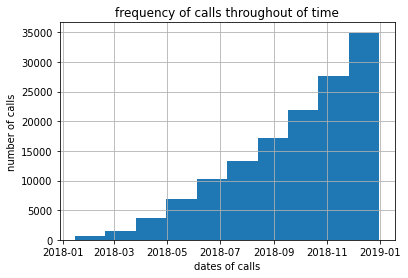

In [13]:
# looking at the distribution of calls throughout of the year by plotting a histogram
calls['call_date'].hist()
plt.title ("frequency of calls throughout of time")
plt.suptitle("")
plt.xlabel("dates of calls")
plt.ylabel("number of calls")
plt.show()

The number of calls increased from the beginning to the end of the year

In [14]:
calls['duration'].unique()

array([ 8.52, 13.66, 14.48, ..., 27.53, 22.57, 25.18])

In [15]:
calls['duration'].value_counts()

0.00     26834
4.02       102
8.37       102
3.91       101
4.30       100
         ...  
31.55        1
24.95        1
26.23        1
29.56        1
25.18        1
Name: duration, Length: 2802, dtype: int64

In [16]:
# finding percentage of values equal to 0 in 'duration' column of calls dataset
report_calls = len(calls.query('duration == 0'))*100/len(calls)
report_calls 

19.48233927469416

Removing 0 duration calls, because a call of 0 duration is a missed call, so there was no call in fact or there was a technical issue. 

In [17]:
calls = calls.query('duration != 0')

In [18]:
# checking the results
calls['duration'].value_counts()

8.37     102
4.02     102
3.91     101
7.61     100
4.30     100
        ... 
31.55      1
24.95      1
26.23      1
29.56      1
25.18      1
Name: duration, Length: 2801, dtype: int64

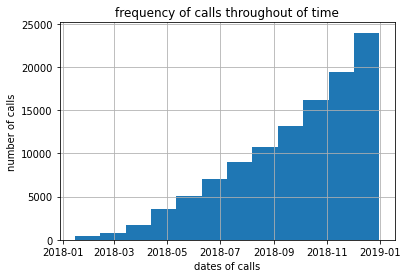

In [19]:
# checking one more time the distribution of dates of call after removing the missed calls
calls['call_date'].hist(bins=12)
plt.title ("frequency of calls throughout of time")
plt.suptitle("")
plt.xlabel("dates of calls")
plt.ylabel("number of calls")
plt.show()

Nothing changed, we did it right, that we removed the missed calls

In [20]:
# checking for duplicates
calls.duplicated().sum()

0

Looking for errors in messages

In [21]:
messages['id'].value_counts()

1000_125    1
1330_126    1
1330_119    1
1330_117    1
1330_114    1
           ..
1151_192    1
1151_191    1
1151_190    1
1151_189    1
1497_613    1
Name: id, Length: 76051, dtype: int64

In [22]:
messages['id'].unique()

array(['1000_125', '1000_160', '1000_223', ..., '1497_547', '1497_558',
       '1497_613'], dtype=object)

In [23]:
messages['user_id'].value_counts()

1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1477       3
1190       3
1161       2
1323       1
1479       1
Name: user_id, Length: 402, dtype: int64

In [24]:
messages['message_date'].value_counts()

2018-12-28    702
2018-12-27    701
2018-12-31    699
2018-12-25    699
2018-12-18    688
             ... 
2018-01-21      3
2018-01-15      2
2018-02-18      2
2018-01-24      2
2018-01-19      1
Name: message_date, Length: 351, dtype: int64

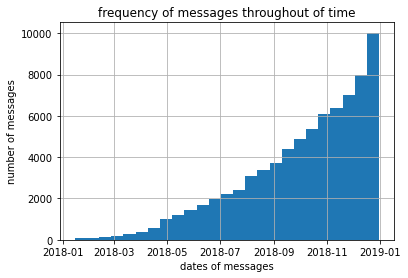

In [25]:
# looking at the distribution of messages throughout of the year by plotting a histogram
messages['message_date'].hist(bins=25)
plt.title ("frequency of messages throughout of time")
plt.suptitle("")
plt.xlabel("dates of messages")
plt.ylabel("number of messages")
plt.show()


Nothing is abnormal compare to the distribution of calls, the number of texts messages increased as well from the beginning to the end of the year with a small peak at the end of the year, which is normal: people send many messages in the end of december between the christmas and the new year eve. 

In [26]:
# checking for duplicates 
messages.duplicated().sum()

0

In [27]:
internet['id'].unique()

array(['1000_13', '1000_204', '1000_379', ..., '1499_217', '1499_218',
       '1499_219'], dtype=object)

In [28]:
internet['id'].value_counts()

1000_13     1
1327_20     1
1327_30     1
1327_29     1
1327_28     1
           ..
1157_26     1
1157_25     1
1157_24     1
1157_23     1
1499_219    1
Name: id, Length: 104825, dtype: int64

In [29]:
internet['user_id'].value_counts()

1185    851
1028    752
1171    716
1498    657
1214    652
       ... 
1323      3
1034      2
1108      2
1306      1
1452      1
Name: user_id, Length: 489, dtype: int64

In [30]:
internet['session_date'].value_counts()

2018-12-24    851
2018-12-30    845
2018-12-27    830
2018-12-21    826
2018-12-31    823
             ... 
2018-01-23      3
2018-01-20      2
2018-01-15      2
2018-01-16      2
2018-01-18      2
Name: session_date, Length: 351, dtype: int64

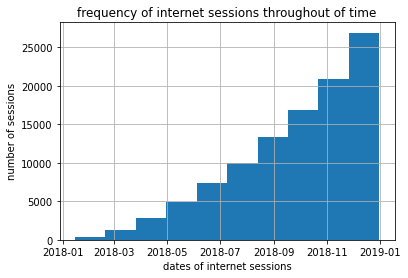

In [31]:
# looking at the distribution of internet sessions throughout of the year
# by plotting a histogram

internet['session_date'].hist()
plt.title ("frequency of internet sessions throughout of time")
plt.suptitle("")
plt.xlabel("dates of internet sessions")
plt.ylabel("number of sessions")
plt.show()


Nothing is abnormal compare to the distribution of calls and messages, the number of internet sessions increased from the beginning to the end of the year with a small peak at the end of the year, which is normal: people send many messages using internet services in the end of december between the christmas and the new year eve.

In [32]:
internet['mb_used'].value_counts()

0.00      13747
435.77        8
414.46        8
423.06        7
417.46        7
          ...  
814.65        1
168.15        1
102.41        1
449.36        1
758.31        1
Name: mb_used, Length: 57624, dtype: int64

In [92]:
# finding percentage of values equal to 0 in 'mb_used' column in internet dataset
report_internet = len(internet.query('mb_used == 0'))*100/len(internet)
'{:.2f}'.format(report_internet)

'13.11'

In [34]:
internet.duplicated().sum()

0

In [35]:
# looking for errors in 'users'

In [36]:
users['user_id'].value_counts()

1000    1
1329    1
1342    1
1341    1
1340    1
       ..
1161    1
1160    1
1159    1
1158    1
1499    1
Name: user_id, Length: 500, dtype: int64

In [37]:
users['first_name'].value_counts()

Leonila     3
Jasper      3
Seymour     3
Lucius      2
Errol       2
           ..
Olin        1
Hai         1
Shay        1
Rebbecca    1
Shena       1
Name: first_name, Length: 458, dtype: int64

In [38]:
users['last_name'].value_counts()

David        3
Morrison     3
Grimes       3
Kelley       3
Velazquez    3
            ..
Cain         1
Robinson     1
Adkins       1
Bean         1
Dickson      1
Name: last_name, Length: 399, dtype: int64

In [39]:
users['age'].value_counts()

18    15
70    14
69    14
61    14
27    14
20    13
28    13
33    12
30    12
47    11
39    11
67    11
51    11
52    11
65    11
64    10
46    10
29    10
49    10
45    10
75    10
36    10
34    10
42    10
26    10
53    10
56     9
66     9
60     9
23     9
59     8
21     8
44     8
19     8
41     7
25     7
38     7
57     7
22     7
48     7
50     6
40     6
54     6
31     6
35     6
37     6
24     6
63     6
71     6
55     6
74     6
58     5
73     5
72     4
32     4
62     4
43     3
68     2
Name: age, dtype: int64

In [40]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

In [41]:
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [42]:
users['reg_date'].value_counts()

2018-03-08    5
2018-11-29    5
2018-02-06    5
2018-08-03    5
2018-07-12    5
             ..
2018-09-28    1
2018-11-09    1
2018-04-13    1
2018-05-29    1
2018-02-04    1
Name: reg_date, Length: 266, dtype: int64

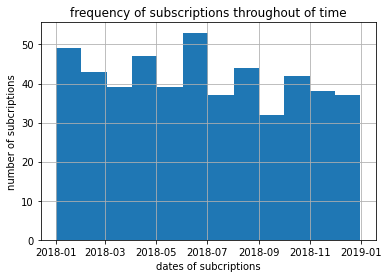

In [43]:
# looking at the distribution of dates of subsriptions throughout of the year 
# by plotting a histogram
users['reg_date'].hist(bins = 12)
plt.title ("frequency of subscriptions throughout of time")
plt.suptitle("")
plt.xlabel("dates of subcriptions")
plt.ylabel("number of subcriptions")
plt.show()

There's nothing abnormal: the subscriptions distributed almost proportionally throughtout of the year with a small peak in july and slight decrease in the end of the year this also proves that there's nothing strange in the distribution the calls, internet sessions and text messages throughout of the year:the more new users, the more use of services

In [44]:
users['churn_date'].value_counts()

2018-12-18    3
2018-12-31    2
2018-11-14    2
2018-12-19    2
2018-12-15    1
2018-11-18    1
2018-09-17    1
2018-12-10    1
2018-08-19    1
2018-11-21    1
2018-09-01    1
2018-12-26    1
2018-08-16    1
2018-10-22    1
2018-10-03    1
2018-10-13    1
2018-07-31    1
2018-11-16    1
2018-11-30    1
2018-12-22    1
2018-11-29    1
2018-12-27    1
2018-12-12    1
2018-11-11    1
2018-11-24    1
2018-10-07    1
2018-12-30    1
2018-09-07    1
2018-09-18    1
Name: churn_date, dtype: int64

In [45]:
users.query('churn_date < reg_date')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


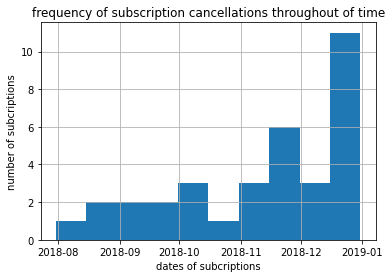

In [46]:
# looking at the distribution of dates of subsriptions throughout of the year 
# by plotting a histogram
users['churn_date'].hist()
plt.title ("frequency of subscription cancellations throughout of time")
plt.suptitle("")
plt.xlabel("dates of subcriptions")
plt.ylabel("number of subcriptions")
plt.show()


Nothing is special: there's a peak at the end of the year, which may be explained by the fact that people change the telecomunicattions carrier/ subscription plan with a purchase of a new mobile phone during festive period at the end of the year 

In [47]:
users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

In [48]:
users.duplicated().sum()

0

In [49]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Replacing values in the column 'mb_per_month_included' in 'plans' by gigabytes in order to make it in compliance with the rules of subscription plans: monthly traffic included is measured in gigabytes

In [50]:
print('Before:')

display(plans)

plans['mb_per_month_included'] = (plans['mb_per_month_included']/1024).astype('int')

plans

plans.rename(columns = {'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

# checking the results: 

print('After:')

display(plans)


Before:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


After:


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Preprocessing the datasets before merging

In [51]:
# retrieving a month from a date of a call ('call date') and adding a new column to 'calls'
display (calls.head())
calls['month'] = calls['call_date'].dt.month_name()
# checking results
display(calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,December
1,1000_145,1000,2018-12-27,13.66,December
2,1000_247,1000,2018-12-27,14.48,December
3,1000_309,1000,2018-12-28,5.76,December
4,1000_380,1000,2018-12-30,4.22,December


In [52]:
# retrieving a month from a date of a message ('message_date')  
# and adding a new column to 'messages'
display (messages.head())
messages['month'] = messages['message_date'].dt.month_name()
# checking results
display(messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


In [53]:
# retrieving a month from a date of internet connection ('session_date')  
# and adding a new column to 'internet'
display (internet.head())
internet['month'] = internet['session_date'].dt.month_name()
# checking results
display(messages.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


In [54]:
# rounding up call duration to the next integer 
# in order to make it compatible with subcription plan rules

display (calls.head())
calls['duration'] = np.ceil(calls['duration'])

#checking results

calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,December
1,1000_145,1000,2018-12-27,13.66,December
2,1000_247,1000,2018-12-27,14.48,December
3,1000_309,1000,2018-12-28,5.76,December
4,1000_380,1000,2018-12-30,4.22,December


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,December
1,1000_145,1000,2018-12-27,14.0,December
2,1000_247,1000,2018-12-27,15.0,December
3,1000_309,1000,2018-12-28,6.0,December
4,1000_380,1000,2018-12-30,5.0,December


In [55]:
# grouping datasets by 'user_id' and 'month'
# in order to calculate consumption parameters per month 

# processing 'calls'

print ('Before:')

display(calls.head())

calls_grouped = calls.groupby(['user_id', 'month']). agg({'id': 'count', 'duration': 'sum'})

calls_grouped = calls_grouped.reset_index()

# renaming the column 'id' to 'calls_number' to enhance readability of the table

calls_grouped.rename(columns = {'id' : 'calls_number'}, inplace = True)

calls_grouped['calls_number'] = calls_grouped['calls_number'].astype('int') 
calls_grouped['duration'] = calls_grouped['duration'].astype('int')

#checking the results

print('After:')

display(calls_grouped.head(10))

Before:


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,December
1,1000_145,1000,2018-12-27,14.0,December
2,1000_247,1000,2018-12-27,15.0,December
3,1000_309,1000,2018-12-28,6.0,December
4,1000_380,1000,2018-12-30,5.0,December


After:


,user_id,month,calls_number,duration
0,1000,December,16,124
1,1001,August,22,182
2,1001,December,46,412
3,1001,November,49,426
4,1001,October,47,393
5,1001,September,38,315
6,1002,December,38,384
7,1002,November,48,386
8,1002,October,8,59
9,1003,December,118,1104


In [56]:
# processing 'messages'

print ('Before:')
display (messages.head())

messages_grouped = messages.groupby(['user_id', 'month']).agg({'id': 'count'})

messages_grouped = messages_grouped.reset_index()

# renaming the column 'id' to 'texts_number' to enhance readability of the table

messages_grouped.rename(columns = {'id': 'texts_number'}, inplace = True)


# checking the results

print('After:')
messages_grouped.head(10)


Before:


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


After:


,user_id,month,texts_number
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
5,1001,September,44
6,1002,December,41
7,1002,November,32
8,1002,October,15
9,1003,December,50


In [57]:
# processing 'internet'

print ('Before:')
display (internet.head())

internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

internet_grouped.reset_index(inplace=True)

# replacing column 'mb_used' with the one showing gigabytes used per month 
# in accordance with the rule of subcription plans policy:  
# monthly traffic per month measured in gigabytes is rounded up 

internet_grouped['mb_used'] = np.ceil(internet_grouped['mb_used']/ 1024)

internet_grouped.rename(columns ={'mb_used': 'gb_used'}, inplace=True)


# checking the results

print('After:')
internet_grouped.head(10)

Before:


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


After:


,user_id,month,gb_used
0,1000,December,2.0
1,1001,August,7.0
2,1001,December,19.0
3,1001,November,19.0
4,1001,October,22.0
5,1001,September,14.0
6,1002,December,15.0
7,1002,November,19.0
8,1002,October,7.0
9,1003,December,27.0


In [58]:
# merging datasets

calls_messages_merged = pd.merge (left = calls_grouped, 
                      right = messages_grouped, how = 'outer', on = ['user_id', 'month']).fillna(0)

all_services = pd.merge(left = calls_messages_merged, 
                      right = internet_grouped, how = 'outer', on = ['user_id', 'month']).fillna(0)

all_users = pd.merge(left = all_services,
                    right = users, how = 'outer', on = ['user_id']).fillna(0)


# changing data types from float to integer

all_users['calls_number'] = all_users['calls_number'].astype('int')
all_users['duration'] = all_users['duration'].astype('int')
all_users['texts_number'] = all_users['texts_number'].astype('int')
all_users['gb_used'] = all_users['gb_used'].astype('int')

# cheking the results

all_users.head(10)

,user_id,month,calls_number,duration,texts_number,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,December,16,124,11,2,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,August,22,182,30,7,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,December,46,412,44,19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,November,49,426,36,19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,October,47,393,53,22,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
5,1001,September,38,315,44,14,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
6,1002,December,38,384,41,15,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
7,1002,November,48,386,32,19,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
8,1002,October,8,59,15,7,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0
9,1003,December,118,1104,50,27,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0


In [59]:
all_users.head()

,user_id,month,calls_number,duration,texts_number,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,December,16,124,11,2,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0
1,1001,August,22,182,30,7,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
2,1001,December,46,412,44,19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
3,1001,November,49,426,36,19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0
4,1001,October,47,393,53,22,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0


In [60]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [61]:
# calculating monthly revenue per user

# creating a function calculating the revenue

def revenue(row): 
    
    traffic = row['gb_used']
    texts = row ['texts_number']
    minutes = row ['gb_used']
    plan = row['plan']
    fix = plans[plans.plan_name == plan]['usd_monthly_pay'].item()
  
    
    traffic_included = plans[plans.plan_name == plan]['gb_per_month_included'].item()
    texts_included = plans[plans.plan_name == plan]['messages_included'].item()
    minutes_included = plans[plans.plan_name == plan]['minutes_included'].item()
    
    traffic_cost = plans[plans.plan_name == plan]['usd_per_gb'].item()
    texts_cost = plans[plans.plan_name == plan]['usd_per_message'].item()
    minutes_cost = plans[plans.plan_name == plan]['usd_per_minute'].item()
    
    if traffic <= traffic_included: 
        extra_traffic = 0
        
    else: 
        extra_traffic = traffic - traffic_included
        
        
    if texts <= texts_included: 
        extra_texts = 0
        
    else:
        extra_texts = texts - texts_included
        
    
    if minutes <= minutes_included:
        extra_minutes = 0 
        
    else: 
        extra_minutes = minutes - minutes_included
    
    revenue = fix + (extra_traffic*traffic_cost) + (extra_texts*texts_cost) + (extra_minutes*minutes_cost)
            
    
    return revenue
    

all_users['revenue_per_month'] = all_users.apply(revenue, axis = 1)

#checking the results

all_users.head(10)
    


,user_id,month,calls_number,duration,texts_number,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,revenue_per_month
0,1000,December,16,124,11,2,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,70.00
1,1001,August,22,182,30,7,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
2,1001,December,46,412,44,19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
3,1001,November,49,426,36,19,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,60.00
4,1001,October,47,393,53,22,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,90.09
5,1001,September,38,315,44,14,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,20.00
6,1002,December,38,384,41,15,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,20.00
7,1002,November,48,386,32,19,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,60.00
8,1002,October,8,59,15,7,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0,20.00
9,1003,December,118,1104,50,27,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0,140.00


### Conclusion

We have first converted the data types of values representing dates from 'object' to 'datetime'. 

Then we have checked all of the datasets.  We found that in the datasetcontaining information on calls made by Megaline users ('calls') there were about 19,4 % of values equal 0 which related to the duration of calls. It means that in fact there were no calls made in those cases. It's quite significant, but we need to remove the rows containing these values in order to get rid of data which may make the whole picture dirtier: we will count these calls as normal, so the total number of calls made by a user will be affected. 

In the dataset containing information on the web traffic ('internet') we found that there were 13.1 % of values equal to '0' which related to the volume of a web traffic consumed by a user during a session. The 0 value in this case means that there was no internet connection. But unlike to the case of calls, these data will not affect the results of our analysis: we will not count the the number of internet sessions, we will only calculate the total traffic per month. 

We also did some other preparations. We have first rounded up each of the call communication duration to the next bigger integer, as it is provided by the subscription plans rules.  
After thant we retrieved the month in which all of the communications were made (calls, messages, web traffic sessions) and then we grouped the values of each of the said datasets by user identifier ('user_id') and the month of such communications in order to calculate: 
-  the web traffic consumed by each of users during each of the month of using of Megaline services. Then we converted this volume to the volume rounded  up to gigabytes, as it is provided by the rules of Megaline subscription plans; 
-  the number of minutes of communication used by each of the users per month;
-  the number of text messages sent by each of the users ;

In the dataset containing information on subscription plans rules ('plans') we converted the values related to the number of megabytes included in a plan  to gigabytes as it conforms with rules of Megaline subscription plans: megabytes are rounded up to gigabutes.

We then merged all of the 'grouped' datasets and dataset containg information on users ('users') in order to facilitate our further calculations.

Finally, we calculated the revenue that Megaline had from each of the users per month in 2018 and stored these values in the said 'merged' dataset. 

## Step 3: Analysing Data

Analyzing call communication minutes consumption by users of both plans

In [62]:
# selecting relevant dataslices
minutes_surf = all_users.loc[all_users.plan == 'surf', 'duration']
minutes_ultimate = all_users.loc[all_users.plan == 'ultimate', 'duration']

# calculating mean, standard deviation and variance 
# for minutes consumption values by users of each of the plans

# calling minutes consumption by surf users

print('Variance of calling minutes consumption with regard to the surf users:', np.var(minutes_surf))
minutes_surf.describe()

Variance of calling minutes consumption with regard to the surf users: 55420.45670514804


count    1579.000000
mean      427.120329
std       235.490079
min         0.000000
25%       269.000000
50%       424.000000
75%       576.000000
max      1510.000000
Name: duration, dtype: float64

In [63]:
# calling minutes consumption by ultimate users

print('Variance of calling minutes consumption with regard to the ultimate users:', np.var(minutes_ultimate))
minutes_ultimate.describe()

Variance of calling minutes consumption with regard to the ultimate users: 58463.016940874826


count     724.000000
mean      428.071823
std       241.958423
min         0.000000
25%       258.750000
50%       421.500000
75%       564.250000
max      1369.000000
Name: duration, dtype: float64

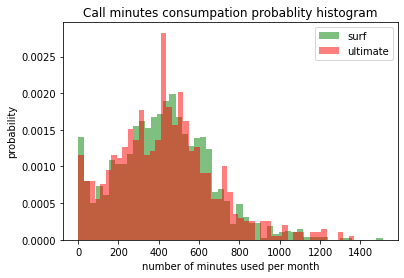

In [64]:
# plotting probabilty histograms on minutes used  by users of both plans

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(minutes_surf, **kwargs, color ='g', label ='surf')
plt.hist(minutes_ultimate, **kwargs, color = 'r', label = 'ultimate')
plt.gca().set(title = 'Call minutes consumpation probablity histogram', ylabel = 'probability', xlabel ='number of minutes used per month')
plt.legend()
plt.show()

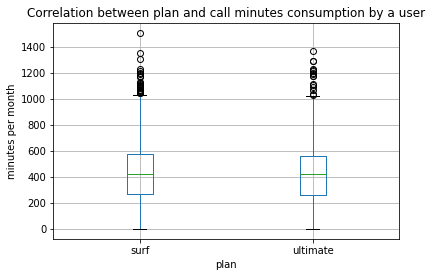

In [65]:
# finding outliers by plotting a box plot with whiskers

all_users.boxplot(column = 'duration', by = 'plan', return_type = 'axes')
plt.title ("Correlation between plan and call minutes consumption by a user")
plt.suptitle("")
plt.xlabel("plan")
plt.ylabel("minutes per month")
plt.show()


Outliers in both cases are values above circa 1000 minutes

In [66]:
# analysing web traffic consumption by users of both plans

# selecting relevant dataslices
traffic_surf = all_users.loc[all_users.plan == 'surf', 'gb_used']
traffic_ultimate = all_users.loc[all_users.plan == 'ultimate', 'gb_used']

# calculating mean, standard deviation and variance 
# for web traffic consumption values by users of each of the plans

# web traffic consumption by surf users

print('Variance of web traffic consumption values distribution with regard to the surf users:', np.var(traffic_surf))
traffic_surf.describe()

Variance of web traffic consumption values distribution with regard to the surf users: 62.36260594142324


count    1579.000000
mean       16.607346
std         7.899502
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

In [67]:
# web traffic consumption by ultimate users

print('Variance of web traffic consumption values distribution with regard to the ultimate users:', np.var(traffic_ultimate))
traffic_ultimate.describe()

Variance of web traffic consumption values distribution with regard to the ultimate users: 60.06998221971246


count    724.000000
mean      17.211326
std        7.755841
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64

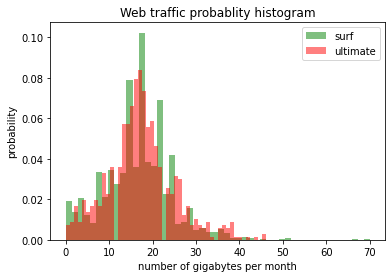

In [68]:
# plotting histograms on webtraffic used by users of both plans

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(traffic_surf, **kwargs, color ='g', label = 'surf')
plt.hist(traffic_ultimate, **kwargs, color = 'r', label = 'ultimate')
plt.gca().set(title = 'Web traffic probablity histogram', ylabel = 'probability', xlabel ='number of gigabytes per month')
plt.legend()
plt.show()

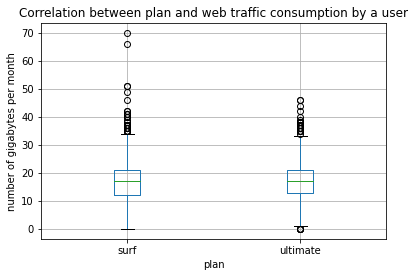

In [69]:
# finding outliers by plotting a box plot with whiskers

all_users.boxplot(column = 'gb_used', by = 'plan', return_type = 'axes')
plt.title ("Correlation between plan and web traffic consumption by a user")
plt.suptitle("")
plt.xlabel("plan")
plt.ylabel("number of gigabytes per month")
plt.show()


The top threshold for outliers in both cases is close: about 34,5 in the case of 'surf' users and 33 of ultimate users in the case of "surf" plan there is no below threshold, while in the case of ultimate users the below threshold is 1 gigabytes.

In [70]:
# analysing text messages consumption by users of both plans

# selecting relevant dataslices
texts_surf = all_users.loc[all_users.plan == 'surf', 'texts_number']
texts_ultimate = all_users.loc[all_users.plan == 'ultimate', 'texts_number']

# calculating mean, standard deviation and variance 
# for number of text messages per month values with regard to  the users of each of the plans

# text messages consumption by surf users

print('Variance of text messages consumption values distribution with regard to the surf users:', np.var(texts_surf))
texts_surf.describe()

Variance of text messages consumption values distribution with regard to the surf users: 1125.4048918656479


count    1579.000000
mean       31.041165
std        33.557683
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: texts_number, dtype: float64

In [71]:
# text messages consumption by ultimate users

print('Variance of text messages consumption values distribution with regard to the ultimate users:', np.var(texts_ultimate))
texts_ultimate.describe()

Variance of text messages consumption values distribution with regard to the ultimate users: 1208.15657908794


count    724.000000
mean      37.343923
std       34.782576
min        0.000000
25%        6.000000
50%       30.000000
75%       60.250000
max      166.000000
Name: texts_number, dtype: float64

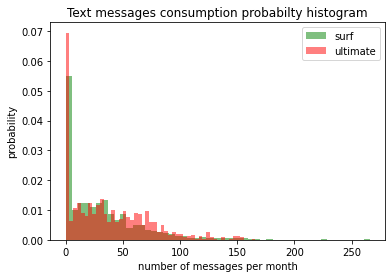

In [72]:
# plotting histograms on number of text messages sent by users of two plans

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(texts_surf, **kwargs, color ='g', label ='surf')
plt.hist(texts_ultimate, **kwargs, color = 'r', label = 'ultimate')
plt.gca().set(title = 'Text messages consumption probabilty histogram', ylabel = 'probability', xlabel ='number of messages per month')
plt.legend()
plt.show()


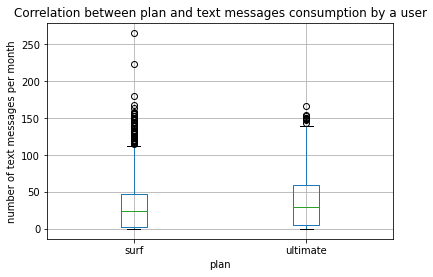

In [73]:
# finding outliers by plotting a box plot with whiskers

all_users.boxplot(column = 'texts_number', by = 'plan', return_type = 'axes')
plt.title ("Correlation between plan and text messages consumption by a user")
plt.suptitle("")
plt.xlabel("plan")
plt.ylabel("number of text messages per month")
plt.show()

The top threshold of outliers for 'ultimate' users is around 140, while for 'surf' users is around 110.

### Conclusion

We have analysed users' behavior with regard to using (consumption) of voice communication, internet and text messaging services. 
For each of the group of users (those who are subscribed to 'surf' plan and those who are subscribed to 'ultimate' plan) we have found mean, standard deviation and variance. We have also plotted probabilty histograms so that we could compare the distributions of these values with regard to these two groups and box plot with whiskers in order evaluate the outliers in these distributions. 
The general funding is that the consumers from the two groups have quite similar behavior. They tend to consume the same amounts of voice communication 'minutes', web traffic, and text messages. Below the more detailed description of what we found from this analysis. 

A. Voice communication service usage. 

The average per month consumption is almost the same: 427 minutes for 'surf' users and 428 minutes for 'ultimate' users. The standard deviation and variance  are also similar: 

- 235 (std) and 55420 (var) in the case of 'surf' users 
and 
- 241 (std) and 58463 (var) in the case of 'ultimate' users. 

When we look at probablity histogram for distribution of these values we see that the two histograms look a like: there's a peak close to 'zero' on the left of the two histograms, all other values are distributed almost normally around the mean. The users with number of messages above around 1000 messages are outliers in the both cases.  The difference is that the mean peak in the case of 'ultimate' users is more significant than the other. 

So we may conclude that there's a share of users in the two groups which tend not use or use relatively a little the voice service, while the other users of the two groups are 'distributed' proportionally around the average level of consumption.

B. Internet communication service usage. 

The picture is the same as in the case of voice communication service. The average per month consumption is almost the same: 16 gigabytes in the case of 'surf' users and 17 gigabytes in the case of 'ultimate' users. The standard deviation and variance are practically the same: 

-  7.8 (std) and 62.36(var) in the case of 'surf' users
and 

-  7.75 (std) and 60 (var) in the case of 'ultimate' users.

The probability histograms show that the values are distributed almost normally, with the same density, the difference is that the mean peak of surf users is more significant than the one in the case of ultimate users. The top level thresholds are close (34,5 in the case of 'surf' users and 33 in the case of 'ultimate' users), there is no above threshold in the case of 'surf' users, while the 'ultimate' users using less than 1 gigabytes per month are outliers. So we may say that 'surf' users tend to use the internet service  a bit more actively than the 'ultimate' users.

It's quite logical: 'surf' users call a little bit less, but use internet service more instead. At the same time we see that the average value  

C. Text messages. 

Here the situation is also similar, but a little more different compare the other cases. The average number of text messages sent by 'surf' users is  31, while the average number of messages sent by 'ultimate' users is 37. The standard deviation and variance are the same time close to each other: 

- 33.55 (std) and 1125.4(var) in the case of 'surf' users,
and 
- 34.7 (std) and 1208.15(var) in the case of 'ultimate' users. 

The reason of the difference between the average numbers is good illustrated by the probability histograms: we see that 0 and close to 0 message usage is quite typic for both types of users, for 'ultimate' users is even more typical than for the other groupe, but at the same time the 'ultimate' users histogram is a little bit skewed to the right with outliers on the right,  while the other histogram a little bit more to the left. The box plot with whiskers is even more illustrative: the top threshold of the 'ultimate' users is around 140 messages per month, while ion the case of 'surf' users it is about 110 messages.  So we may say the the 'surf' users use text messages a little bit less, than the 'ultimate' users. But the difference is not crucial. 


## Step 4: Testing hypotheses

In [74]:
# preanalysing  revenue per month from a user 

# selecting relevant dataslices
rev_surf = all_users.loc[all_users.plan == 'surf', 'revenue_per_month']
rev_ultimate = all_users.loc[all_users.plan == 'ultimate', 'revenue_per_month']

# calculating mean, standard deviation and variance for revenue values each of the plans

# revenue from surf users values

print('Variance of revenue distribution with regard to the surf users:', np.var(rev_surf))
rev_surf.describe()

Variance of revenue distribution with regard to the surf users: 2968.1223360817507


count    1579.000000
mean       58.714965
std        54.497736
min        20.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       572.280000
Name: revenue_per_month, dtype: float64

In [75]:
# revenue from ultimate users values

print('Variance of revenue values distribution with regard to the ultimate users:', np.var(rev_ultimate))
rev_ultimate.describe()

Variance of revenue values distribution with regard to the ultimate users: 128.98115900003052


count    724.000000
mean      72.301105
std       11.364839
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: revenue_per_month, dtype: float64

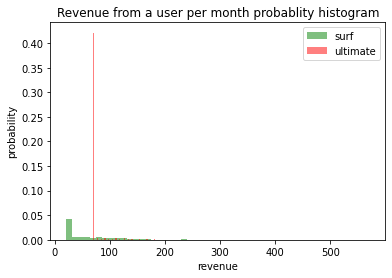

In [76]:
# plotting probability histograms on revenue per month from users of both plans

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(rev_surf, **kwargs, color ='g', label = 'surf')
plt.hist(rev_ultimate, **kwargs, color = 'r', label ='ultimate')
plt.gca().set(title = 'Revenue from a user per month probablity histogram', 
              ylabel = 'probability', xlabel ='revenue')
plt.legend()
plt.show()

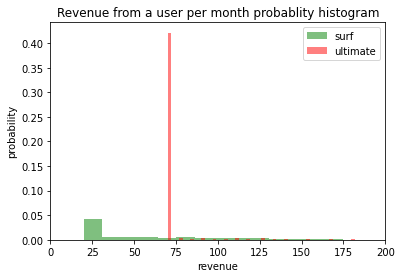

In [77]:
# zooming in histograms

plt.hist(rev_surf, **kwargs, color ='g', label = 'surf')
plt.hist(rev_ultimate, **kwargs, color = 'r', label = 'ultimate')
plt.xlim(0,200)
plt.gca().set(title = 'Revenue from a user per month probablity histogram', ylabel = 'probability', xlabel ='revenue')
plt.legend()
plt.show()

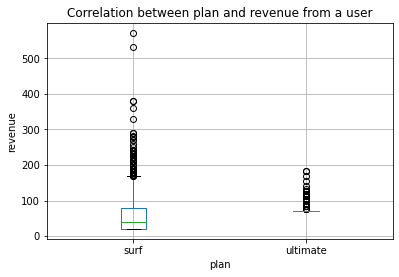

In [78]:
# finding outliers

all_users.boxplot(column = 'revenue_per_month', by = 'plan', return_type = 'axes')
plt.title ("Correlation between plan and revenue from a user")
plt.suptitle("")
plt.xlabel("plan")
plt.ylabel("revenue")
plt.show()



So the revenue of users with 'surf' plan above 170 and those with 'ultimate' plan under 70 are outliers 

In [79]:
# slicing the dataset from outliers 
filtered_surf = all_users.query('plan == "surf" and revenue_per_month < 170')
filtered_ultimate = all_users.query('plan == "ultimate" and revenue_per_month <= 70')

In [80]:
# checking the results 
display(filtered_surf['revenue_per_month'].describe())
display(filtered_ultimate['revenue_per_month'].describe())

count    1504.000000
mean       50.220259
std        36.695574
min        20.000000
25%        20.000000
50%        40.000000
75%        70.525000
max       163.000000
Name: revenue_per_month, dtype: float64

count    683.0
mean      70.0
std        0.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max       70.0
Name: revenue_per_month, dtype: float64

Testing hypothesis that the average revenue from users of ultimate and surf calling plans differs.

H0 is "sample distributions are equal" i.e. distributions of revenue values from surf and ultimate users

H1 is "sample distributions are not equal"

alpha = 0.05

In [81]:
# before removing  outliers

# selecting data samples
rev_surf = all_users.loc[all_users.plan == 'surf', 'revenue_per_month']
rev_ultimate = all_users.loc[all_users.plan == 'ultimate', 'revenue_per_month']

# comparing samples
stat, p = mannwhitneyu(rev_surf, rev_ultimate)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=344000.000, p=0.00000
Different distribution (reject H0)


In [82]:
# after removing outliers

# selecting data samples

rev_surf_filtd = filtered_surf['revenue_per_month']
rev_ultimate_filtd = filtered_ultimate['revenue_per_month']

# comparing samples
stat, p = mannwhitneyu(rev_surf_filtd, rev_ultimate_filtd)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')



Statistics=283103.500, p=0.00000
Different distribution (reject H0)


In [83]:
all_users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 89
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
El Paso, TX MSA                                      2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

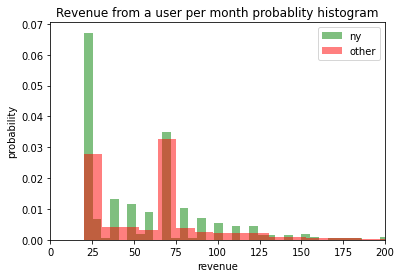

In [84]:
# looking at the distribution of revenue values with regard to NY area and other areas

ny_area = all_users.loc[all_users.city == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 
                        'revenue_per_month']
other_area = all_users.loc[all_users.city != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 
                           'revenue_per_month']

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)
plt.hist(ny_area, **kwargs, color ='g', label = 'ny')
plt.hist(other_area, **kwargs, color = 'r', label = 'other')
plt.xlim(0,200)
plt.gca().set(title = 'Revenue from a user per month probablity histogram', 
              ylabel = 'probability', xlabel ='revenue')
plt.legend()
plt.show()

In [85]:
ny_area.describe()

count    378.000000
mean      58.601746
std       43.114999
min       20.000000
25%       20.000000
50%       50.000000
75%       70.000000
max      280.000000
Name: revenue_per_month, dtype: float64

In [86]:
other_area.describe()

count    1925.000000
mean       63.846997
std        46.511205
min        20.000000
25%        20.540000
50%        70.000000
75%        70.000000
max       572.280000
Name: revenue_per_month, dtype: float64

Testing hypothesis that the average revenue from users in NY-NJ area is different from that of the users from other regions

H0 is "sample distributions are equal"
i.e. distributions of revenue values from user in NY-NJ area and users from othe areas 

H1 is "sample distributions are not equal"

alpha = 0.05

In [87]:

# comparing samples
stat, p = mannwhitneyu(ny_area, other_area)
print('Statistics=%.3f, p=%.3f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')



Statistics=328607.500, p=0.001
Different distribution (reject H0)


In [88]:
# checking the test after removing the outliers

# removing the outliers
all_users_filtered = all_users.query(('plan == "surf" and revenue_per_month < 170') or ('plan == "ultimate" and revenue_per_month <= 70'))


# creating new samples 

ny_area_filt = all_users_filtered.loc[all_users.city == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 
                        'revenue_per_month']
other_area_filt = all_users_filtered.loc[all_users.city != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 
                           'revenue_per_month']


# comparing samples
stat, p = mannwhitneyu(ny_area_filt, other_area_filt)
print('Statistics=%.3f, p=%.3f' % (stat, p))


# interpretating
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')



Statistics=173879.500, p=0.153
Same distribution (fail to reject H0)


### Conclusion

We have tested two hypothesis: 
    
1) The average revenue from users of 'ultimate' and 'surf' calling plans differs.
2) The average revenue from users in NY-NJ area is different from that of the users from other regions.

A. First hypothesis
To test the first hypothesis we made some preliminary analysis of the revenue values distribution within these two group of users. 

We found that variance of values of 'ultimate' users was not significant. The most of the values were close to the mean, which was very close (72 dollars) to the monthly charge of 70 dollars. 

The situation with 'surf' users was different. The average revenue was 58 dollars, so it was far from the montly charge of 20 dollars. The reason of this is explained by the fact the consumer behavior was quite similar in the two cases. The 'surf' users paid exta charges for the services, because they consumed  the same volume of services as the 'ultimate' users. 

We have also plotted probabilty histograms in order to see better what the distribution looked like. We saw that the distribution of values in these cases was far from 'normal'. This is also quite predictable, taking into account, that the subcription plans do not provide a lot of 'variability' to the users. 

So we decided to use the Mann-Whitney U test which seemed to be more approriate, because it is designed to be used in the case of any kind of distributions. The 'idea' of the test is to valuate the probabilty that the two datasets are taken from the one statistical population. The test enables to compare  data samples and gives a suggestion whether we may reject the hypothesis  that data samples distributions are the same (and taken from the same statistical population). Taking into account that if the distributions are the same, so the average of values should be the same as well, so we may use this test to test hypothesis as if an average of values related to one statictical population differs from another. 


For alpha value we choosed a standard "0.05". In accordance with the rules of the test we formulated H0 hypothesis as "the distributions of the data samples are the same" and H1 is "the distributions of the data samples are not the same". So if the test suggests not to reject the H0 hypothesis, we may further consider this hypothesis as likely possible. 

As there were outliers within two groups of users, we decided to make the test twice: once before the removing the outliers and then after. We determined the outliers with IQR method (170 dollars as the high threshold for 'surf' users, and 70 dollars for 'ultimate' users). 

The result in the two cases was the same: the p-value found with the test was 0, so the test suggests to reject the H0 hypothesis and not to reject the alternative hypothesis, that the distributions are different, and therefore the average levels are  likely to be different. 

B. Second hypothesis

As with the above, we decided to use the Mann-Whitney U test as the distributions of the values of selected data samples were far from 'normal'. The logic was the same as above: we test hypothesis, that the distributions of data samples are eqauall, and if tests suggests to reject this hypothesis, and not to reject the alternative hypothesis (that the distribution is different, and thefore the average is likely to be different). 
So H0 hypothesis was formulated in the same manner: 'distributions of the data samples are the same", and the H1: "the distributions of the data samples are not the same". For tha alpha was chosen the standard threshold - "0.05". 
We conducted this test two times: once before removing the outliers and then after removing the outliers. The results were different. The first result was "to reject the H0 hypothesis" (the p-value was only 0.001), but the second was to "fail to reject the H0" (the p-value was 0.153). In other words, we have no evidence to say, that there's a difference between the average income from a user from NY-NJ area and other are of service. 

## General conclusion

I. INTRODUCTION

Megaline offers its clients two prepaid plans, Surf and Ultimate.  The goal of this research is  to conduct based  on a relatively small client selection a preliminary analysis of  clients' behavior and to determine which prepaid plan brings in more revenue.

We have had 5 datasets:
1) 'users' which contains information on 500 Megaline's users: user's id, user's names, user's age, user's city of residence, user's subscription plan, date of subscription to the plan ('registration date'), and the date a user stopped using this plan. The latter one is missing in the most of cases (466 cases), so it means that the most of the users in the dataset are still using services with the given plan.
2) 'calls' which contains information on calls made by the users: call's id, user's id which made this call, call's duration and the date of a call. This dataset contains 137735 entries.
3) 'internet' which contains information on the users' internet connection sessions: internet session' id, user's id which made this session, the session's date, and the volume of internet traffic used during each of the session. This dataset contains 104825 entries.
4) 'messages' which contains information on messages sent by the users: message'id, user's id which sent this message, and the date on which the message was sent.
5) 'plans' which contains information on both of the subcription plans features: number of messages, minutes of calls communication, data volume included in monthly allowance of each of the plans, monthly paymnet rate, and also the rates of fees for exceeding data volume, text messages and minutes of calls with regard to the each of the plans.

II. PREPROCESSING

At the preprocessing stage we have checked all of the datasets. We found that in the dataset containing information on calls made by Megaline users ('calls') there were about 19,4 % of values equal 0 which related to the duration of calls. It means that in fact there were no calls made in those cases. It's quite significant, but we decided to remove the rows containing these values in order to get rid of data which may make the whole picture dirtier: we would have count these calls as normal, so the total number of calls made by a user will be affected.

In the dataset containing information on the web traffic ('internet') we found that there were 13.1 % of values equal to '0' which related to the volume of a web traffic consumed by a user during a session. The 0 value in this case means that there was no internet connection. But unlike to the case of calls, these data will not affect the results of our analysis: we will not count the the number of internet sessions, we will only calculate the total traffic per month.

We then prepared the given data for further processing: 

1) we converted the data types of values representing dates from 'object' to 'datetime';
2) we rounded up each of the call communication duration to the next bigger integer, as it is provided by the subscription plans rules;
3)  we retrieved the month in which all of the communications were made (calls, messages, web traffic sessions) and then we grouped the values of each of the said datasets by user identifier ('user_id') and the month of such communications in order to calculate:
- the number of minutes of communication used by each of the users per month;
- the number of text messages sent by each of the users;
4) in the dataset containing information on subscription plans rules ('plans') we converted the values related to the number of megabytes included in a plan to gigabytes as it conforms with rules of Megaline subscription plans: megabytes are rounded up to gigabytes.
5) we then merged all of the 'grouped' datasets and dataset containg information on users ('users') in order to facilitate our further calculations.
6) Finally, we calculated the revenue that Megaline had from each of the users per month in 2018 and stored these values in the said 'merged' dataset.

III. ANALYSING USERS BEHAVIOR

We have analysed users' behavior with regard to using (consumption) of voice communication, internet and text messaging services. 
For each of the group of users (those who are subscribed to 'surf' plan and those who are subscribed to 'ultimate' plan) we have found mean, standard deviation and variance. We have also plotted probabilty histograms so that we could compare the distributions of these values with regard to these two groups. 

The general funding is that the consumers from the two groups have quite similar behavior. We may say that the users  tend to consume the same amounts of voice communication 'minutes', web traffic, and text messages. Below the more detailed description of what we found from this analysis. 

A. Voice communication service usage. 

The average per month consumption is almost the same: 427 minutes for 'surf' users and 428 minutes for 'ultimate' users. The standard deviation and variance  are also similar: 

- 235 (std) and 55420 (var) in the case of 'surf' users 
and 
- 241 (std) and 58463 (var) in the case of 'ultimate' users. 

When we look at probablity histogram for distribution of these values we see that the two histograms look a like: there's a peak close to 'zero' on the left of the two histograms, all other values are distributed almost normally around the mean. The users with number of messages above around 1000 messages are outliers in the both cases (found in accordance with IQR method). The difference is that the mean peak in the case of 'ultimate' users is more significant than the other. 

So we may conclude that there's a share of users in the two groups which tend not use or use relatively a little the voice service, while the other users of the two groups are 'distributed' proportionally around the average level of consumption.

B. Internet communication service usage. 

The picture is the same as in the case of voice communication service. The average per month consumption is almost the same: 16 gigabytes in the case of 'surf' users and 17 gigabytes in the case of 'ultimate' users. The standard deviation and variance are practically the same: 

-  7.8 (std) and 62.36(var) in the case of 'surf' users
and 

-  7.75 (std) and 60 (var) in the case of 'ultimate' users.

The probability histograms show that the values are distributed almost normally, with the same density, the difference is that the mean peak of surf users is more significant than the one in the case of ultimate users, and there are some outliers on the right in the case of 'surf' users. The top level thresholds are close (34,5 in the case of 'surf' users and 33 in the case of 'ultimate' users), there is no above threshold in the case of 'surf' users, while the 'ultimate' users using less than 1 gigabytes per month are outliers. So we may say that 'surf' users tend a bit more to use the internet service  more actively than the 'ultimate' users. 

It's quite logical: 'surf' users call a little bit less, but use internet service more instead. At the same time we see that the average value  

C. Text messages. 

Here the situation is also similar, but a little more different compare the other cases. The average number of text messages sent by 'surf' users is  31, while the average number of messages sent by 'ultimate' users is 37. The standard deviation and variance are the same time close to each other: 

- 33.55 (std) and 1125.4(var) in the case of 'surf' users,
and 
- 34.7 (std) and 1208.15(var) in the case of 'ultimate' users. 

The reason of the difference between the average numbers is good illustrated by the probability histograms: we see that 0 and close to 0 message usage is quite typic for both types of users, for 'ultimate' users is even more typical than for the other groupe, but at the same time the 'ultimate' users histogram is a little bit skewed to the right with outliers on the right, while the other histogram a little bit more to the left. The box plot with whiskers is even more illustrative: the top threshold of the 'ultimate' users is around 140 messages per month, while ion the case of 'surf' users it is about 110 messages.  So we may say the the 'surf' users use text messages a little bit less, than the 'ultimate' users. So we may say the the 'surf' users use text messages a little bit less, than the 'ultimate' users. But the difference is not crucial.

IV. TESTING HYPOTHESES

We have tested two hypothesis: 
    
1) The average revenue from users of 'ultimate' and 'surf' calling plans differs.
2) The average revenue from users in NY-NJ area is different from that of the users from other regions.

A. First hypothesis
To test the first hypothesis we made some preliminary analysis of the revenue values distribution within these two group of users. 

We found that variance of values of 'ultimate' users was not significant. The most of the values were close to the mean, which was very close (72 dollars) to the monthly charge of 70 dollars. 

The situation with 'surf' users was different. The average revenue was 58 dollars, so it was far from the monthly charge of 20 dollars. The reason of this is explained by the fact the consumer behavior was quite similar in the two cases. The 'surf' users paid exta charges for the services, because they consumed  the same volume of services as the 'ultimate' users. 

We have also plotted probabilty histograms in order to see better what the distribution looked like. We saw that the distribution of values in these cases was far from 'normal'. This is also quite predictable, taking into account, that the subcription plans do not provide a lot of 'variability' to the users. 

So we decided to use the Mann-Whitney U test which seemed to be more approriate, because it is designed to be used in the case of any kind of distributions. The 'idea' of the test is to valuate the probabilty that the two datasets are taken from the one statistical population. The test enables to compare  data samples and gives a suggestion whether we may reject the hypothesis  that data samples distributions are the same (and taken from the same statistical population). Taking into account that if the distributions are the same, so the average of values should be the same as well, so we may use this test to test hypothesis as if an average of values related to one statictical population differs from another. 


For alpha value we choosed a standard "0.05". In accordance with the rules of the test we formulated H0 hypothesis as "the distributions of the data samples are the same" and H1 is "the distributions of the data samples are not the same". So if the test suggests not to reject the H0 hypothesis, we may further consider this hypothesis as likely possible. 

As there were outliers within two groups of users, we decided to make the test twice: once before the removing the outliers and then after. We determined the outliers with IQR method (170 dollars as the high threshold for 'surf' users, and 70 dollars for 'ultimate' users). 

The result in the two cases was the same: the p-value found with the test was 0, so the test suggests to reject the H0 hypothesis and not to reject the alternative hypothesis, that the distributions are different, and therefore the average levels are  likely to be different. 

B. Second hypothesis

As with the above, we decided to use the Mann-Whitney U test as the distributions of the values of selected data samples were far from 'normal'. The logic was the same as above: we test hypothesis, that the distributions of data samples are eqauall, and if tests suggests to reject this hypothesis, and not to reject the alternative hypothesis (that the distribution is different, and thefore the average is likely to be different). 
So H0 hypothesis was formulated in the same manner: 'distributions of the data samples are the same", and the H1: "the distributions of the data samples are not the same". For tha alpha was chosen the standard threshold - "0.05". 

We conducted this test two times: once before removing the outliers and then after removing the outliers. The results were different. The first result was "to reject the H0 hypothesis", but the second was to "fail to reject the H0". In other words, we have no evidence to say, that there's a difference between the average income from a user from NY-NJ area and other are of service. 



V. SUMMARY 

The goal of this research is to analyse  clients' behavior and to determine which prepaid plan  brings in more revenue. We have found that: 

1) The consumers behavior correlates very weakly with the selected subscription plan: users tend to consume relatively the volumes of traffic, voice communication service and the texts messages. 

2) Such a behavior leads to the fact that revenue gained from a user subcribed to the plan 'surf' varies a lot. While the most of the users under subscription 'ultimate' do not pay exta charges, the other users pay on average almost 3 times more than their initial monthly rate: 58 dollars, while the montly rate is 20 dollars. At the same time, this average level is still lower than the monthly rate of under 'ultimate' plan (70 dollars). 

3) We tested hypothesis if the average level of revenue from two groups differs, and we found that we had no ground to reject the hypothesis that they are different.

4) We tested the hypothesis that users from NJ-NY area bring different average revenue compare to other users. We figured out that we had no ground to accept this hypothesis while we have no evidence to reject the hypothesis that they are not different.

5) Finally, if we assume that the selection of users is representative, hence taking into account the outcomes of hypotheses testing, we may suppose that:  
- the average level of revenue which one 'ultimate' user brings is higher than the  the average level of revenue from a 'surf' user; 
- the average level of  revenue from a NY-NJ area user is not different from  a user from other area. 

6) At the same time taking into account only average revenue levels may be not the best approach when determing which plan brings more revenue. For example, in our data selection, there were  more 'surf' users (339) than 'ultimate' users (161). If we assume that the same proportion remains in the real life and our previous assumptions are also correct, the 'surf' plan brings more revenue than the 'ultimate' plan.  

